In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

btc_price = pd.read_csv("/content/drive/MyDrive/Datasets/Bitcoin Historical Data - Investing.com.csv")
btc_price.tail()
btc_price = btc_price.drop(['Date', 'Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)



In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Datasets/Bitcoin Historical Data - Investing.com.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%


In [ ]:
df.isna()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-07-11,False,False,False,False,False,False
2022-07-10,False,False,False,False,False,False
2022-07-09,False,False,False,False,False,False
2022-07-08,False,False,False,False,False,False
2022-07-07,False,False,False,False,False,False
...,...,...,...,...,...,...
2010-07-22,False,False,False,False,False,False
2010-07-21,False,False,False,False,False,False
2010-07-20,False,False,False,False,False,False


In [ ]:
df["Price"]

Date
2022-07-11    20,489.8
2022-07-10    20,847.4
2022-07-09    21,587.5
2022-07-08    21,611.2
2022-07-07    21,637.8
                ...   
2010-07-22         0.1
2010-07-21         0.1
2010-07-20         0.1
2010-07-19         0.1
2010-07-18         0.1
Name: Price, Length: 4377, dtype: object

In [ ]:
df = df.drop("Open", axis=1)
df = df.drop("Low", axis=1)
df = df.drop("Vol.", axis=1)
df = df.drop("Change %", axis=1)

In [ ]:
df = df.drop("High", axis=1)

In [ ]:
df["Price"] = [float(str(i).replace(",", "")) for i in df["Price"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4377 entries, 2022-07-11 to 2010-07-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   4377 non-null   float64
dtypes: float64(1)
memory usage: 68.4 KB


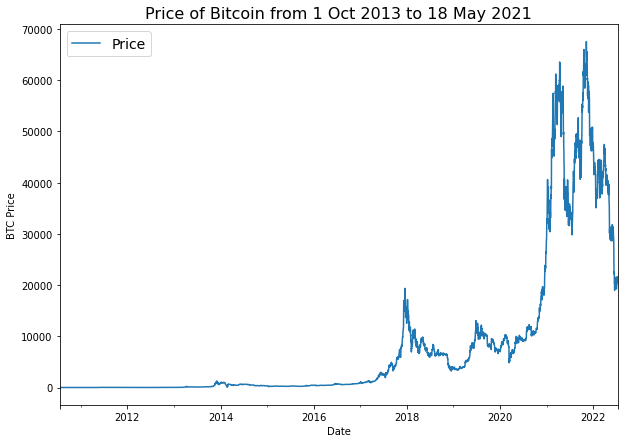

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
df

,Price
Date,
2022-07-11,20489.8
2022-07-10,20847.4
2022-07-09,21587.5
2022-07-08,21611.2
2022-07-07,21637.8
...,...
2010-07-22,0.1
2010-07-21,0.1
2010-07-20,0.1


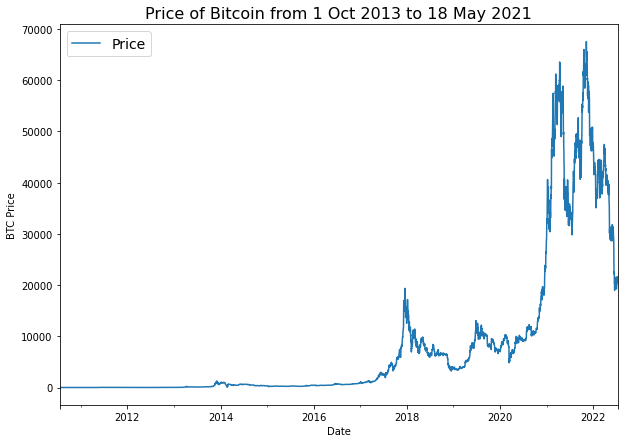

In [ ]:
import matplotlib.pyplot as plt
df.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
df["Price"]
df = df.iloc[::-1]

In [ ]:
timesteps = df.index.to_numpy()
prices = df['Price'].to_numpy()




In [ ]:
timesteps

array(['2010-07-18T00:00:00.000000000', '2010-07-19T00:00:00.000000000',
       '2010-07-20T00:00:00.000000000', ...,
       '2022-07-09T00:00:00.000000000', '2022-07-10T00:00:00.000000000',
       '2022-07-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
timesteps[:10], prices[:10]

(array(['2010-07-18T00:00:00.000000000', '2010-07-19T00:00:00.000000000',
        '2010-07-20T00:00:00.000000000', '2010-07-21T00:00:00.000000000',
        '2010-07-22T00:00:00.000000000', '2010-07-23T00:00:00.000000000',
        '2010-07-24T00:00:00.000000000', '2010-07-25T00:00:00.000000000',
        '2010-07-26T00:00:00.000000000', '2010-07-27T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [ ]:
0.01  * len(prices)

43.77

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(3501, 876, 3501, 876)

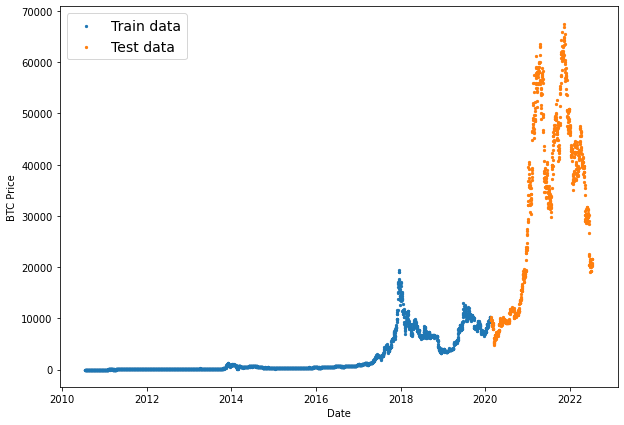

In [ ]:

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#plotting function

In [ ]:
def plot_time_series(timesteps, values, format='', start=0, end=None, label=None):


  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("btc Price")
  if label:
    plt.legend(fontsize=14)

  plt.grid(True)

#model 0

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([ 9701.4, 10158.4,  9609.4,  9602.4,  9684.5,  9655.7,  9942.7,
         9662.7,  9317.2,  8800.3]),
 array([19262.9, 19243.2, 19309.9, 20215.8, 20200.6, 20561.1, 21637.8,
        21611.2, 21587.5, 20847.4]))

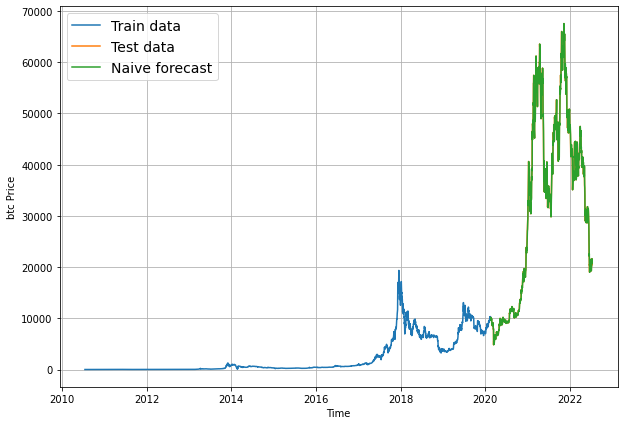

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

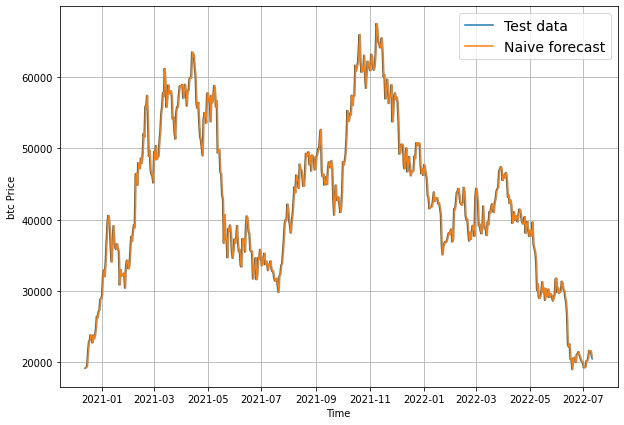

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="", start=offset, label="Naive forecast");

In [ ]:
import tensorflow as tf
import numpy as np

def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9994366709627538

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)

In [ ]:
prices[-10:]

array([19243.2, 19309.9, 20215.8, 20200.6, 20561.1, 21637.8, 21611.2,
       21587.5, 20847.4, 20489.8])

In [ ]:
timesteps

array(['2010-07-18T00:00:00.000000000', '2010-07-19T00:00:00.000000000',
       '2010-07-20T00:00:00.000000000', ...,
       '2022-07-09T00:00:00.000000000', '2022-07-10T00:00:00.000000000',
       '2022-07-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
HORIZON = 1 
WINDOW_SIZE = 7 

In [ ]:
def get_labelled_windows(x, horizon=1):

  return x[:, :-1], x[:, -1:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(12)+1, axis=0))

In [ ]:
test_window, test_label


(<tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[12]], dtype=int32)>)

In [ ]:
def make_windows(x, window_size=7, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  windows_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[windows_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
prices

array([1.00000e-01, 1.00000e-01, 1.00000e-01, ..., 2.15875e+04,
       2.08474e+04, 2.04898e+04])

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=7, horizon=1)
full_windows[-10:], full_labels[-10:]

(array([[21489.9, 21043.5, 20730.2, 20278. , 20111.3, 19926.6, 19262.9],
        [21043.5, 20730.2, 20278. , 20111.3, 19926.6, 19262.9, 19243.2],
        [20730.2, 20278. , 20111.3, 19926.6, 19262.9, 19243.2, 19309.9],
        [20278. , 20111.3, 19926.6, 19262.9, 19243.2, 19309.9, 20215.8],
        [20111.3, 19926.6, 19262.9, 19243.2, 19309.9, 20215.8, 20200.6],
        [19926.6, 19262.9, 19243.2, 19309.9, 20215.8, 20200.6, 20561.1],
        [19262.9, 19243.2, 19309.9, 20215.8, 20200.6, 20561.1, 21637.8],
        [19243.2, 19309.9, 20215.8, 20200.6, 20561.1, 21637.8, 21611.2],
        [19309.9, 20215.8, 20200.6, 20561.1, 21637.8, 21611.2, 21587.5],
        [20215.8, 20200.6, 20561.1, 21637.8, 21611.2, 21587.5, 20847.4]]),
 array([[19243.2],
        [19309.9],
        [20215.8],
        [20200.6],
        [20561.1],
        [21637.8],
        [21611.2],
        [21587.5],
        [20847.4],
        [20489.8]]))

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows,train_labels, test_labels

In [ ]:
train_windows, test_windows,train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3496, 874, 3496, 874)

In [ ]:
train_windows[:1], test_windows[:1],train_labels[:1], test_labels[:1]

(array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]),
 array([[10317.7, 10235.1, 10333. ,  9907.7,  9932.3,  9701.4, 10158.4]]),
 array([[0.1]]),
 array([[9609.4]]))

In [ ]:
test_windows.shape

(874, 7)

In [ ]:
len(y_train)

3501

In [ ]:
import os 

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

#model 1

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 1ms/step - loss: 928.2055 - mae: 928.2055


[928.2055053710938, 928.2055053710938]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 2ms/step - loss: 908.4911 - mae: 908.4911


[908.4910888671875, 908.4910888671875]

In [ ]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return np.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)

In [ ]:
model_1_preds

array([10144.871 ,  9658.663 ,  9614.644 ,  9659.361 ,  9728.059 ,
        9885.309 ,  9732.46  ,  9354.225 ,  8829.859 ,  8822.255 ,
        8693.025 ,  8559.639 ,  8519.844 ,  8909.191 ,  8802.473 ,
        8764.133 ,  9046.789 ,  9189.358 ,  8909.705 ,  8123.4316,
        7926.113 ,  7894.6973,  7937.3887,  5586.486 ,  5848.5635,
        5475.411 ,  5502.6304,  4976.365 ,  5571.41  ,  5314.0293,
        6156.5537,  6210.156 ,  6237.676 ,  5858.987 ,  6475.4336,
        6727.1353,  6724.995 ,  6696.4897,  6462.4365,  6240.5596,
        5909.2407,  6353.063 ,  6419.8584,  6650.131 ,  6784.1816,
        6809.549 ,  6840.5283,  6807.757 ,  7303.135 ,  7226.787 ,
        7372.4365,  7293.6025,  6949.4746,  6821.334 ,  6936.675 ,
        6859.492 ,  6831.7134,  6669.8037,  7054.092 ,  7066.581 ,
        7240.0137,  7129.239 ,  6903.043 ,  6812.5044,  7116.546 ,
        7477.4805,  7524.3955,  7561.6924,  7693.5645,  7796.9956,
        7756.7734,  8705.729 ,  8708.254 ,  8831.647 ,  8956.1

In [ ]:
model_1_preds.shape


(874,)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

In [ ]:
model_1_results


{'mae': 908.4912,
 'mse': 1997341.9,
 'rmse': 1413.2734,
 'mape': 2.8025308,
 'mase': 1.0076104}

In [ ]:
test_labels.shape, model_1_preds.shape

((874, 1), (874,))

In [ ]:
naive_results

{'mae': 900.71814,
 'mse': 1973429.0,
 'rmse': 1404.7878,
 'mape': 2.7989805,
 'mase': 0.9994366}

In [ ]:
test_labels.shape

(874, 1)

In [ ]:
model_1_preds.shape

(874,)

In [ ]:
def plot_time_series(timesteps, values, format='', start=0, end=None, label=None):


  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("btc Price")
  if label:
    plt.legend(fontsize=14)

  plt.grid(True)

In [ ]:
test_labels[:, 0].shape, model_1_preds.shape

((874,), (874,))

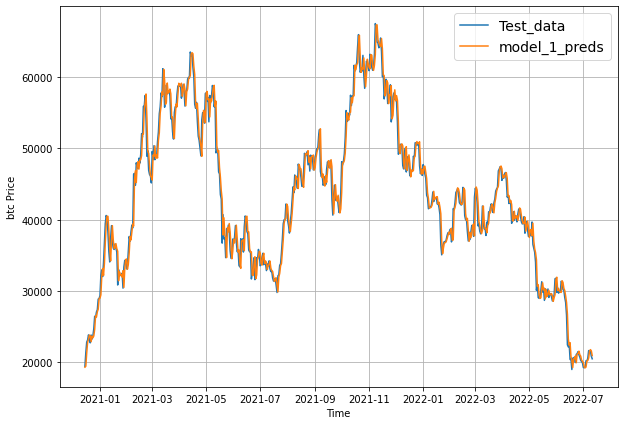

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

#Model 2

prepare the data

In [ ]:
HORIZON = 1 
WINDOW_SIZE = 30 

In [ ]:
def make_windows(x, window_size=7, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  windows_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[windows_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


full_windows, full_labels = make_windows(prices, window_size=30, horizon=1)

def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows,train_labels, test_labels


train_windows, test_windows,train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3477, 870, 3477, 870)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

print results

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)
model_2_preds = make_preds(model_2, test_windows)
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

28/28 [==============================] - 0s 2ms/step - loss: 969.1996 - mae: 969.1996


{'mae': 969.1994,
 'mse': 2183864.0,
 'rmse': 1477.7903,
 'mape': 2.9894693,
 'mase': 1.0705675}

#model 3

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30 

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
len(full_windows), len(full_labels)

(4341, 4341)

In [ ]:
train_windows, test_windows,train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3472, 869, 3472, 869)

In [ ]:
full_labels[:1]

array([[0.1]])

In [ ]:
test_labels.shape

(869, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)
model_3_preds = make_preds(model_3, 
                           input_data=test_windows)

28/28 [==============================] - 0s 2ms/step - loss: 987.8655 - mae: 987.8655


In [ ]:
model_3_preds

array([[ 9892.722,  9896.901,  9991.858, ...,  9851.099,  9896.276,
         9869.76 ],
       [ 9778.789,  9623.438,  9773.945, ...,  9770.9  ,  9618.223,
         9632.831],
       [ 9469.475,  9445.608,  9483.594, ...,  9461.068,  9380.726,
         9339.942],
       ...,
       [22122.879, 21831.01 , 22150.639, ..., 22382.48 , 21803.926,
        21564.895],
       [21833.156, 22210.48 , 22159.906, ..., 21984.578, 21897.307,
        21816.754],
       [21287.053, 21154.299, 21370.209, ..., 21407.809, 20777.5  ,
        21057.807]], dtype=float32)

In [ ]:
test_labels.shape

(869, 1)

In [ ]:
test_labels.shape

(869, 1)

In [ ]:
model_3_preds.shape, test_labels.shape

((869, 7), (869, 1))

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': 987.8654,
 'mse': 2267018.8,
 'rmse': 1036.9385,
 'mape': 3.0612504,
 'mase': 1.0903182}

In [ ]:
model_2_results

{'mae': 969.1994,
 'mse': 2183864.0,
 'rmse': 1477.7903,
 'mape': 2.9894693,
 'mase': 1.0705675}

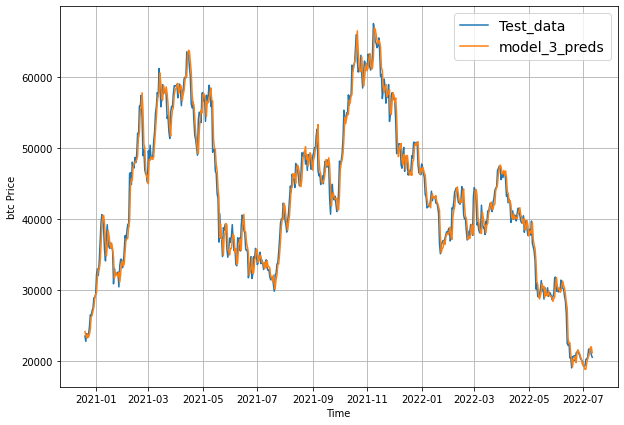

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format="", label="model_3_preds")

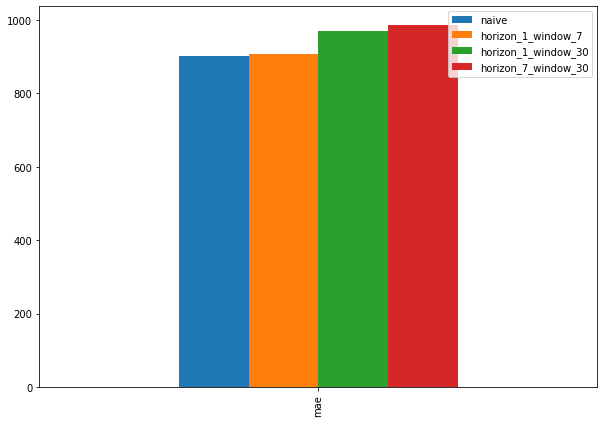

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

In [ ]:
import numpy as np
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [ ]:
x.shape

(3, 5)

In [ ]:
x.ndim

2

#model 4

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3496, 874, 3496, 874)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
                               layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
           
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)


28/28 [==============================] - 0s 2ms/step - loss: 900.9062


900.9061889648438

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]


array([10107.668 ,  9668.657 ,  9596.592 ,  9658.1045,  9675.487 ,
        9900.948 ,  9705.206 ,  9351.147 ,  8835.112 ,  8800.656 ],
      dtype=float32)

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_4_preds)
model_4_results

{'mae': 20356.281,
 'mse': 635195600.0,
 'rmse': 24684.0,
 'mape': 110.394775,
 'mase': 22.577217}

#Model 5

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)

x = layers.LSTM(128, activation="relu")(x)
outputs = layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
23/28 [=======================>......] - ETA: 0s - loss: 1373.1285

28/28 [==============================] - 5s 110ms/step - loss: 1189.7045 - val_loss: 2357.5664
Epoch 2/100
23/28 [=======================>......] - ETA: 0s - loss: 161.5736

28/28 [==============================] - 2s 88ms/step - loss: 157.1488 - val_loss: 1430.6511
Epoch 3/100
24/28 [========================>.....] - ETA: 0s - loss: 118.8993

28/28 [==============================] - 3s 95ms/step - loss: 120.2918 - val_loss: 1386.8306
Epoch 4/100
28/28 [==============================] - 0s 9ms/step - loss: 118.2732 - val_loss: 1415.0615
Epoch 5/100
28/28 [==============================] - 0s 10ms/step - loss: 112.4859 - val_loss: 1418.3739
Epoch 6/100
22/28 [======================>.......] - ETA: 0s - loss: 112.8880

28/28 [==============================] - 3s 113ms/step - loss: 116.1108 - val_loss: 1366.2632
Epoch 7/100
22/28 [======================>.......] - ETA: 0s - loss: 113.7561

28/28 [==============================] - 3s 94ms/step - loss: 109.1393 - val_loss: 1332.6925
Epoch 8/100
24/28 [========================>.....] - ETA: 0s - loss: 105.7571

28/28 [==============================] - 3s 94ms/step - loss: 106.1147 - val_loss: 1304.1458
Epoch 9/100
23/28 [=======================>......] - ETA: 0s - loss: 106.4565

28/28 [==============================] - 3s 117ms/step - loss: 104.1327 - val_loss: 1276.3252
Epoch 10/100
28/28 [==============================] - 0s 9ms/step - loss: 109.9676 - val_loss: 1334.7242
Epoch 11/100
28/28 [==============================] - ETA: 0s - loss: 104.8350

28/28 [==============================] - 3s 96ms/step - loss: 104.8350 - val_loss: 1266.7603
Epoch 12/100
28/28 [==============================] - 0s 9ms/step - loss: 104.0605 - val_loss: 1369.0952
Epoch 13/100
28/28 [==============================] - 0s 9ms/step - loss: 103.4844 - val_loss: 1442.1191
Epoch 14/100
25/28 [=========================>....] - ETA: 0s - loss: 98.6369 

28/28 [==============================] - 3s 96ms/step - loss: 96.7288 - val_loss: 1193.8663
Epoch 15/100
25/28 [=========================>....] - ETA: 0s - loss: 96.0696

28/28 [==============================] - 2s 90ms/step - loss: 95.3102 - val_loss: 1115.6891
Epoch 16/100
28/28 [==============================] - 0s 11ms/step - loss: 95.6253 - val_loss: 1141.9258
Epoch 17/100
28/28 [==============================] - 0s 10ms/step - loss: 93.1077 - val_loss: 1162.1458
Epoch 18/100
28/28 [==============================] - 0s 9ms/step - loss: 91.9148 - val_loss: 1142.9585
Epoch 19/100
28/28 [==============================] - 0s 11ms/step - loss: 90.9752 - val_loss: 1171.1691
Epoch 20/100
28/28 [==============================] - ETA: 0s - loss: 87.9604

28/28 [==============================] - 3s 116ms/step - loss: 87.9604 - val_loss: 1084.5149
Epoch 21/100
22/28 [======================>.......] - ETA: 0s - loss: 80.8326

28/28 [==============================] - 2s 90ms/step - loss: 85.7055 - val_loss: 1074.2119
Epoch 22/100
28/28 [==============================] - 0s 8ms/step - loss: 85.7597 - val_loss: 1120.7321
Epoch 23/100
21/28 [=====================>........] - ETA: 0s - loss: 89.1005

28/28 [==============================] - 3s 95ms/step - loss: 88.6219 - val_loss: 1069.6200
Epoch 24/100
23/28 [=======================>......] - ETA: 0s - loss: 90.0836

28/28 [==============================] - 2s 91ms/step - loss: 89.3290 - val_loss: 1035.5834
Epoch 25/100
23/28 [=======================>......] - ETA: 0s - loss: 83.7964

28/28 [==============================] - 3s 120ms/step - loss: 82.8955 - val_loss: 1027.2285
Epoch 26/100
21/28 [=====================>........] - ETA: 0s - loss: 79.0327

28/28 [==============================] - 2s 92ms/step - loss: 81.1081 - val_loss: 1020.0770
Epoch 27/100
22/28 [======================>.......] - ETA: 0s - loss: 81.4629

28/28 [==============================] - 3s 96ms/step - loss: 81.3707 - val_loss: 1014.8401
Epoch 28/100
27/28 [===========================>..] - ETA: 0s - loss: 80.7730

28/28 [==============================] - 3s 119ms/step - loss: 81.5994 - val_loss: 1009.1728
Epoch 29/100
28/28 [==============================] - 0s 10ms/step - loss: 81.7456 - val_loss: 1356.5997
Epoch 30/100
27/28 [===========================>..] - ETA: 0s - loss: 86.6641

28/28 [==============================] - 3s 98ms/step - loss: 86.5826 - val_loss: 1003.0018
Epoch 31/100
22/28 [======================>.......] - ETA: 0s - loss: 82.1875

28/28 [==============================] - 3s 94ms/step - loss: 78.7225 - val_loss: 1002.5696
Epoch 32/100
28/28 [==============================] - 0s 9ms/step - loss: 78.2854 - val_loss: 1026.3125
Epoch 33/100
28/28 [==============================] - 0s 9ms/step - loss: 78.4896 - val_loss: 1032.1952
Epoch 34/100
28/28 [==============================] - 0s 10ms/step - loss: 79.8807 - val_loss: 1027.7111
Epoch 35/100
28/28 [==============================] - 0s 10ms/step - loss: 81.9551 - val_loss: 1055.2469
Epoch 36/100
22/28 [======================>.......] - ETA: 0s - loss: 83.1692

28/28 [==============================] - 3s 96ms/step - loss: 80.2986 - val_loss: 981.1976
Epoch 37/100
28/28 [==============================] - 0s 12ms/step - loss: 77.5692 - val_loss: 982.3848
Epoch 38/100
28/28 [==============================] - 0s 11ms/step - loss: 79.0786 - val_loss: 1019.5549
Epoch 39/100
22/28 [======================>.......] - ETA: 0s - loss: 78.0873

28/28 [==============================] - 3s 127ms/step - loss: 77.1386 - val_loss: 974.5387
Epoch 40/100
25/28 [=========================>....] - ETA: 0s - loss: 78.5349

28/28 [==============================] - 3s 96ms/step - loss: 78.9306 - val_loss: 969.2340
Epoch 41/100
28/28 [==============================] - 0s 9ms/step - loss: 78.2065 - val_loss: 1006.3468
Epoch 42/100
28/28 [==============================] - 0s 11ms/step - loss: 77.8275 - val_loss: 978.2212
Epoch 43/100
28/28 [==============================] - 0s 11ms/step - loss: 76.7236 - val_loss: 974.5762
Epoch 44/100
22/28 [======================>.......] - ETA: 0s - loss: 75.5919

28/28 [==============================] - 3s 98ms/step - loss: 77.4724 - val_loss: 968.0837
Epoch 45/100
28/28 [==============================] - 0s 10ms/step - loss: 78.0579 - val_loss: 1263.7814
Epoch 46/100
28/28 [==============================] - 0s 9ms/step - loss: 85.0723 - val_loss: 1010.5100
Epoch 47/100
28/28 [==============================] - 0s 9ms/step - loss: 75.2170 - val_loss: 974.7436
Epoch 48/100
28/28 [==============================] - 0s 10ms/step - loss: 75.8453 - val_loss: 1006.5511
Epoch 49/100
28/28 [==============================] - 0s 9ms/step - loss: 77.8359 - val_loss: 973.9578
Epoch 50/100
28/28 [==============================] - 0s 9ms/step - loss: 76.0683 - val_loss: 1337.1945
Epoch 51/100
28/28 [==============================] - 0s 10ms/step - loss: 83.7754 - val_loss: 1032.8894
Epoch 52/100
28/28 [==============================] - 0s 13ms/step - loss: 77.4266 - val_loss: 1101.5667
Epoch 53/100
28/28 [==============================] - ETA: 0s - loss: 79.02

28/28 [==============================] - 3s 116ms/step - loss: 79.0293 - val_loss: 956.8471
Epoch 54/100
28/28 [==============================] - 0s 9ms/step - loss: 75.6866 - val_loss: 1106.3416
Epoch 55/100
28/28 [==============================] - 0s 10ms/step - loss: 77.0469 - val_loss: 1053.7772
Epoch 56/100
22/28 [======================>.......] - ETA: 0s - loss: 74.7161

28/28 [==============================] - 3s 95ms/step - loss: 77.9202 - val_loss: 948.2555
Epoch 57/100
22/28 [======================>.......] - ETA: 0s - loss: 77.8109

28/28 [==============================] - 3s 96ms/step - loss: 78.4274 - val_loss: 945.7847
Epoch 58/100
28/28 [==============================] - 0s 10ms/step - loss: 76.2413 - val_loss: 951.9406
Epoch 59/100
28/28 [==============================] - 0s 9ms/step - loss: 74.6100 - val_loss: 971.9171
Epoch 60/100
28/28 [==============================] - 0s 11ms/step - loss: 75.7350 - val_loss: 945.9657
Epoch 61/100
22/28 [======================>.......] - ETA: 0s - loss: 76.3093

28/28 [==============================] - 3s 93ms/step - loss: 74.0927 - val_loss: 939.4644
Epoch 62/100
28/28 [==============================] - 0s 9ms/step - loss: 74.3827 - val_loss: 954.6736
Epoch 63/100
28/28 [==============================] - 0s 9ms/step - loss: 75.1041 - val_loss: 945.9089
Epoch 64/100
23/28 [=======================>......] - ETA: 0s - loss: 73.9529

28/28 [==============================] - 3s 120ms/step - loss: 74.5851 - val_loss: 939.2079
Epoch 65/100
24/28 [========================>.....] - ETA: 0s - loss: 73.4164

28/28 [==============================] - 3s 95ms/step - loss: 73.8988 - val_loss: 936.2508
Epoch 66/100
28/28 [==============================] - 0s 9ms/step - loss: 75.1429 - val_loss: 1018.9595
Epoch 67/100
23/28 [=======================>......] - ETA: 0s - loss: 79.0144

28/28 [==============================] - 3s 92ms/step - loss: 78.2596 - val_loss: 932.1945
Epoch 68/100
28/28 [==============================] - 0s 9ms/step - loss: 76.1243 - val_loss: 939.2078
Epoch 69/100
28/28 [==============================] - 0s 11ms/step - loss: 73.3982 - val_loss: 954.5495
Epoch 70/100
28/28 [==============================] - 0s 9ms/step - loss: 74.4716 - val_loss: 943.6397
Epoch 71/100
28/28 [==============================] - 0s 11ms/step - loss: 74.4749 - val_loss: 1154.2377
Epoch 72/100
28/28 [==============================] - 0s 9ms/step - loss: 78.4921 - val_loss: 934.1092
Epoch 73/100
23/28 [=======================>......] - ETA: 0s - loss: 75.2194

28/28 [==============================] - 3s 93ms/step - loss: 74.5292 - val_loss: 927.2839
Epoch 74/100
27/28 [===========================>..] - ETA: 0s - loss: 74.3178

28/28 [==============================] - 3s 118ms/step - loss: 74.0893 - val_loss: 926.8847
Epoch 75/100
27/28 [===========================>..] - ETA: 0s - loss: 74.8366

28/28 [==============================] - 3s 95ms/step - loss: 75.1448 - val_loss: 924.9213
Epoch 76/100
28/28 [==============================] - 0s 10ms/step - loss: 74.3185 - val_loss: 926.6483
Epoch 77/100
22/28 [======================>.......] - ETA: 0s - loss: 73.8674

28/28 [==============================] - 3s 96ms/step - loss: 73.1609 - val_loss: 924.0955
Epoch 78/100
28/28 [==============================] - 0s 10ms/step - loss: 76.1580 - val_loss: 971.3602
Epoch 79/100
21/28 [=====================>........] - ETA: 0s - loss: 75.6053

28/28 [==============================] - 2s 90ms/step - loss: 73.0913 - val_loss: 923.6619
Epoch 80/100
28/28 [==============================] - 0s 11ms/step - loss: 72.9344 - val_loss: 938.5875
Epoch 81/100
28/28 [==============================] - 0s 11ms/step - loss: 75.8754 - val_loss: 930.6001
Epoch 82/100
28/28 [==============================] - 0s 12ms/step - loss: 75.9029 - val_loss: 958.0191
Epoch 83/100
28/28 [==============================] - 0s 11ms/step - loss: 78.4869 - val_loss: 950.2781
Epoch 84/100
28/28 [==============================] - 0s 9ms/step - loss: 74.4598 - val_loss: 935.4662
Epoch 85/100
28/28 [==============================] - 0s 11ms/step - loss: 72.3086 - val_loss: 965.9972
Epoch 86/100
28/28 [==============================] - 0s 10ms/step - loss: 74.0024 - val_loss: 960.8851
Epoch 87/100
28/28 [==============================] - 0s 11ms/step - loss: 73.5459 - val_loss: 924.9595
Epoch 88/100
28/28 [==============================] - 0s 10ms/step - loss: 72.

28/28 [==============================] - 3s 119ms/step - loss: 74.6264 - val_loss: 918.0461
Epoch 90/100
28/28 [==============================] - 0s 9ms/step - loss: 72.4733 - val_loss: 971.3893
Epoch 91/100
28/28 [==============================] - 0s 9ms/step - loss: 73.1978 - val_loss: 934.2352
Epoch 92/100
23/28 [=======================>......] - ETA: 0s - loss: 73.4992

28/28 [==============================] - 3s 94ms/step - loss: 73.4584 - val_loss: 916.4698
Epoch 93/100
28/28 [==============================] - 0s 10ms/step - loss: 72.0585 - val_loss: 976.2205
Epoch 94/100
28/28 [==============================] - 0s 11ms/step - loss: 74.1663 - val_loss: 917.6451
Epoch 95/100
28/28 [==============================] - 0s 11ms/step - loss: 75.4752 - val_loss: 1019.7363
Epoch 96/100
28/28 [==============================] - 0s 9ms/step - loss: 75.1578 - val_loss: 952.7671
Epoch 97/100
28/28 [==============================] - 0s 9ms/step - loss: 72.5163 - val_loss: 919.0984
Epoch 98/100
28/28 [==============================] - 0s 9ms/step - loss: 72.8078 - val_loss: 922.6843
Epoch 99/100
22/28 [======================>.......] - ETA: 0s - loss: 75.8634

28/28 [==============================] - 2s 92ms/step - loss: 73.5178 - val_loss: 916.3264
Epoch 100/100
28/28 [==============================] - 0s 9ms/step - loss: 75.5599 - val_loss: 1030.9270


In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 3ms/step - loss: 916.3264


916.326416015625

In [ ]:
model_5_preds = make_preds(model_5, test_windows)


In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

In [ ]:
model_5_results

{'mae': 916.3266,
 'mse': 2038963.4,
 'rmse': 1427.9227,
 'mape': 2.8149452,
 'mase': 1.0163007}

#model 6 

make another feature(Bitcoin Block reward)

In [ ]:
df.index[0]

Timestamp('2010-07-18 00:00:00')

In [ ]:
#block rewards values
block_reward_1 = 50 # 3 January 2009 (2009-01-03)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

#block reward dates
block_reward_1_datetime = np.datetime64("2010-07-18")
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")





In [ ]:
df.index[0]

Timestamp('2010-07-18 00:00:00')

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_1_days = (block_reward_2_datetime - df.index[0]).days
block_reward_2_days = (block_reward_3_datetime - df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - df.index[0]).days


block_reward_1_days, block_reward_2_days, block_reward_3_days

(864, 2183, 3585)

In [ ]:
bitcoin_prices_block = df.copy()
bitcoin_prices_block["block_reward"] = None

In [ ]:
len(bitcoin_prices_block)

4377

In [ ]:


# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_1_days, -1] = block_reward_1
bitcoin_prices_block.iloc[block_reward_1_days:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.tail()


,Price,block_reward
Date,,
2022-07-07,21637.8,6.25
2022-07-08,21611.2,6.25
2022-07-09,21587.5,6.25
2022-07-10,20847.4,6.25
2022-07-11,20489.8,6.25


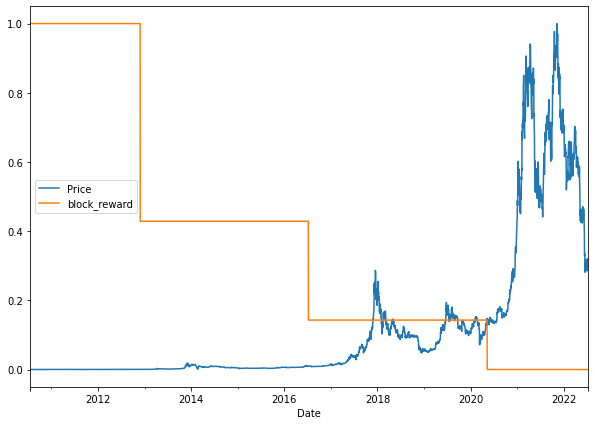

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));


In [ ]:
bitcoin_prices_block

,Price,block_reward
Date,,
2010-07-18,0.1,50
2010-07-19,0.1,50
2010-07-20,0.1,50
2010-07-21,0.1,50
2010-07-22,0.1,50
...,...,...
2022-07-07,21637.8,6.25
2022-07-08,21611.2,6.25
2022-07-09,21587.5,6.25


In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2010-07-18,0.1,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.1,50,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.1,50,0.1,0.1,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.1,50,0.1,0.1,0.1,NaN,NaN,NaN,NaN
2010-07-22,0.1,50,0.1,0.1,0.1,0.1,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2010-07-25,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-26,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-27,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-28,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-29,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [ ]:
y

Date
2010-07-25        0.100000
2010-07-26        0.100000
2010-07-27        0.100000
2010-07-28        0.100000
2010-07-29        0.100000
                  ...     
2022-07-07    21637.800781
2022-07-08    21611.199219
2022-07-09    21587.500000
2022-07-10    20847.400391
2022-07-11    20489.800781
Name: Price, Length: 4370, dtype: float32

In [ ]:
y.head()

Date
2010-07-25    0.1
2010-07-26    0.1
2010-07-27    0.1
2010-07-28    0.1
2010-07-29    0.1
Name: Price, dtype: float32

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:] 
len(X_train), len(y_train), len(X_test), len(y_test)

(3496, 3496, 874, 874)

In [ ]:
X_train.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2010-07-25,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-26,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-27,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-28,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-29,50.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [ ]:
tf.random.set_seed(42)



model_6 = tf.keras.Sequential([
                               layers.Dense(512, activation="relu"),
                               layers.Dense(256, activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(64, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
X_train.shape

(3496, 8)

In [ ]:
model_6.summary()

Model: "model_6_dense_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               4608      
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

28/28 [==============================] - 0s 3ms/step - loss: 901.0415


901.04150390625

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10125.861,  9677.147,  9615.369,  9673.54 ,  9678.731,  9917.024,
        9709.383,  9358.272,  8842.812,  8813.075], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)

In [ ]:
model_6_results

{'mae': 901.0415,
 'mse': 1987984.4,
 'rmse': 1409.959,
 'mape': 2.794155,
 'mase': 0.999348}

In [ ]:
model_1_results

{'mae': 908.4912,
 'mse': 1997341.9,
 'rmse': 1413.2734,
 'mape': 2.8025308,
 'mase': 1.0076104}

In [ ]:
naive_results

{'mae': 900.71814,
 'mse': 1973429.0,
 'rmse': 1404.7878,
 'mape': 2.7989805,
 'mase': 0.9994366}

#model 6.1 With separate input features(prices-block reward)

In [ ]:
df_model_6_prices = df.copy()

In [ ]:
df_model_6_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4377 entries, 2010-07-18 to 2022-07-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   4377 non-null   float64
dtypes: float64(1)
memory usage: 68.4 KB


In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2010-07-18,0.1,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.1,50,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.1,50,0.1,0.1,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.1,50,0.1,0.1,0.1,NaN,NaN,NaN,NaN
2010-07-22,0.1,50,0.1,0.1,0.1,0.1,NaN,NaN,NaN


In [ ]:
df_model_6_block_reward = bitcoin_prices_windowed.copy()

In [ ]:
 df_model_6_block_reward.drop(["Price" ,"Price+1", "Price+2", "Price+3","Price+4","Price+5", "Price+6","Price+7"], axis=1)

,block_reward
Date,
2010-07-18,50
2010-07-19,50
2010-07-20,50
2010-07-21,50
2010-07-22,50
...,...
2022-07-07,6.25
2022-07-08,6.25
2022-07-09,6.25


In [ ]:
#replicate model 6 but with separate features

In [ ]:
# prices_input = layers.Input(shape=([1,]), dtype=tf.float64, name="price_input")
# x = layers.Dense(512, activation="relu")(prices_input)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dense(128, activation="relu")(x)
# x = layers.Dense(64, activation="relu")(x)
# prices_output = layers.Dense(HORIZON)(x)
# prices_model = tf.keras.Model(inputs=prices_input,
#                               outputs=prices_output)

# block_reward_input = layers.Input(shape=([1,]), dtype=tf.int32, name="price_input")
# x = layers.Dense(512, activation="relu")(prices_input)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dense(128, activation="relu")(x)
# x = layers.Dense(64, activation="relu")(x)
# block_reward_output = layers.Dense(HORIZON)(x)
# block_reward_model = tf.keras.Model(inputs=block_reward_input,
#                                     outputs=block_reward_output)



#Model 7 N beats Algorithm

create the N beats algorithm

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):

  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)] 

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
    
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

  


In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_nbeats_block_layer

In [ ]:
x

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'lstm')>

In [ ]:
x = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
x

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(x)

In [ ]:
backcast

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[-0.10331293, -0.35961515, -0.19455579, -0.17794842, -0.7820447 ,
         1.6632918 , -0.45827657]], dtype=float32)>

In [ ]:
forecast

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.14226238]], dtype=float32)>

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
df.head()

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1


In [ ]:
bitcoin_prices_nbeats = df.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"prices+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,prices+1,prices+2,prices+3,prices+4,prices+5,prices+6,prices+7
Date,,,,,,,,
2010-07-25,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-26,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-27,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-28,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2010-07-29,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test), 

(3496, 3496, 874, 874)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS = 10
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])



In [ ]:
tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

for i, _ in enumerate(range(N_STACKS-1)):

  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-Beats")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=0)])

Epoch 1/10
4/4 [==============================] - 26s 3s/step - loss: 5303.2095 - mae: 5303.2095 - mse: 85388824.0000 - val_loss: 801643.4375 - val_mae: 801643.4375 - val_mse: 843703517184.0000 - lr: 0.0010
Epoch 2/10
4/4 [==============================] - 11s 3s/step - loss: 15473.6592 - mae: 15473.6592 - mse: 546097472.0000 - val_loss: 64946.9180 - val_mae: 64946.9180 - val_mse: 5538021376.0000 - lr: 0.0010
Epoch 3/10
4/4 [==============================] - 11s 3s/step - loss: 3053.4634 - mae: 3053.4634 - mse: 33965380.0000 - val_loss: 10855.8789 - val_mae: 10855.8789 - val_mse: 164228288.0000 - lr: 0.0010
Epoch 4/10
4/4 [==============================] - 11s 3s/step - loss: 2687.5906 - mae: 2687.5906 - mse: 27619814.0000 - val_loss: 3304.4485 - val_mae: 3304.4485 - val_mse: 18538572.0000 - lr: 0.0010
Epoch 5/10
4/4 [==============================] - 11s 3s/step - loss: 1414.0352 - mae: 1414.0353 - mse: 8088289.0000 - val_loss: 2935.7444 - val_mae: 2935.7444 - val_mse: 14486835.0000 -

In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 1s 740ms/step - loss: 2578.3235 - mae: 2578.3235 - mse: 11046320.0000


[2578.323486328125, 2578.323486328125, 11046320.0]

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

array([9433.282, 9087.182, 9157.504, 8932.168, 8995.792, 9165.989,
       8965.634, 8756.032, 8436.405, 8476.617], dtype=float32)

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

model_7_results

{'mae': 2578.3235,
 'mse': 11046320.0,
 'rmse': 3323.6003,
 'mape': 8.26418,
 'mase': 2.8596268}

In [ ]:

model_1_results

{'mae': 908.4912,
 'mse': 1997341.9,
 'rmse': 1413.2734,
 'mape': 2.8025308,
 'mase': 1.0076104}

#Model 8

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae","mse","mape"]):
  ensemble_models = []

  for i in range(num_iter):

    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      ensemble_models.append(model)

    return ensemble_models     


  

In [ ]:
ensemble_model = get_ensemble_models(num_iter=10,
                                          num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 582: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 634: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 734: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 156: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 256: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_model,
                                     data=test_dataset)
ensemble_preds.shape

TensorShape([3, 874])

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))

ensemble_results

{'mae': 913.2281,
 'mse': 2007967.4,
 'rmse': 1417.0277,
 'mape': 2.8743799,
 'mase': 1.0128641}

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper 

lower, upper = get_upper_lower(preds=ensemble_preds)

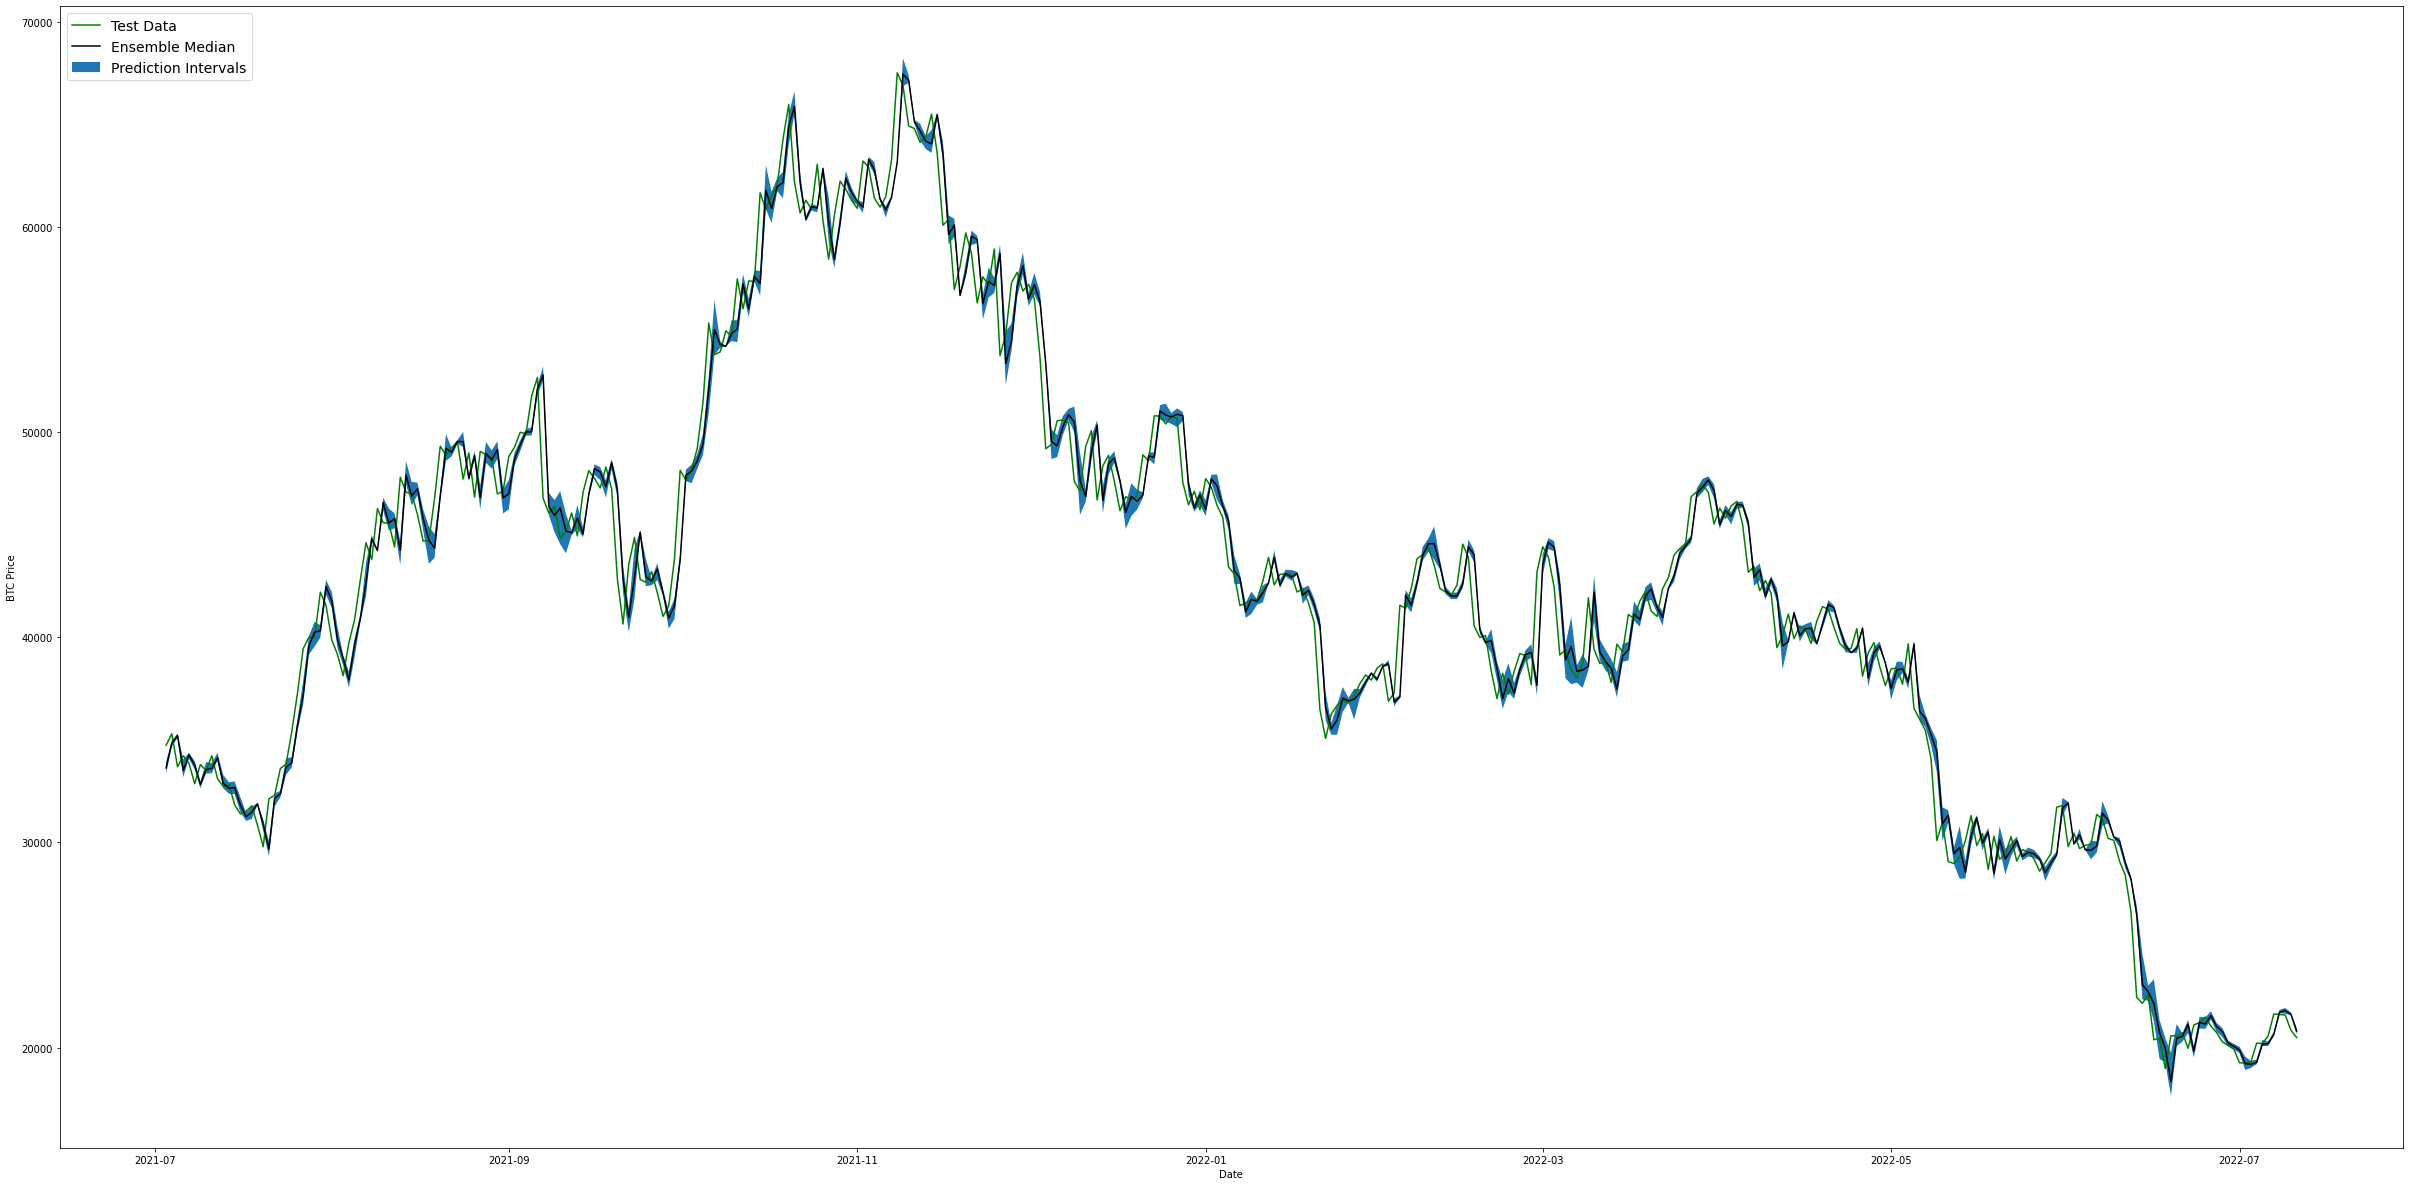

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(42, 21))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

#Model 9

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2010-07-18,0.1,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.1,50,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.1,50,0.1,0.1,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.1,50,0.1,0.1,0.1,NaN,NaN,NaN,NaN
2010-07-22,0.1,50,0.1,0.1,0.1,0.1,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
X_all[:-10, :-9]

array([], shape=(4360, 0), dtype=float64)

In [ ]:
y_all

array([1.00000e-01, 1.00000e-01, 1.00000e-01, ..., 2.15875e+04,
       2.08474e+04, 2.04898e+04])

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)

])


model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)


In [ ]:
INTO_FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):

    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [20200.6 20561.1 21637.8 21611.2 21587.5 20847.4 20489.8] -> Prediction: 20920.283203125

Predicting on: 
 [20561.1        21637.8        21611.2        21587.5
 20847.4        20489.8        20920.28320312] -> Prediction: 21330.00390625

Predicting on: 
 [21637.8        21611.2        21587.5        20847.4
 20489.8        20920.28320312 21330.00390625] -> Prediction: 21655.24609375

Predicting on: 
 [21611.2        21587.5        20847.4        20489.8
 20920.28320312 21330.00390625 21655.24609375] -> Prediction: 21608.822265625

Predicting on: 
 [21587.5        20847.4        20489.8        20920.28320312
 21330.00390625 21655.24609375 21608.82226562] -> Prediction: 21459.830078125

Predicting on: 
 [20847.4        20489.8        20920.28320312 21330.00390625
 21655.24609375 21608.82226562 21459.83007812] -> Prediction: 21095.212890625

Predicting on: 
 [20489.8        20920.28320312 21330.00390625 21655.24609375
 21608.82226562 21459.83007812 21095.21289062] -> Pre

In [ ]:
future_forecast[:10]

[20920.283,
 21330.004,
 21655.246,
 21608.822,
 21459.83,
 21095.213,
 21142.326,
 21466.727,
 21677.32,
 21753.4]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = df.index[-1]
last_timestep

Timestamp('2022-07-11 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
       '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
       '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
       '2022-07-24', '2022-07-25'], dtype='datetime64[D]')

In [ ]:
df

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2022-07-07,21637.8
2022-07-08,21611.2
2022-07-09,21587.5


In [ ]:
btc_price = df.to_numpy()

In [ ]:
btc_price.dtype

dtype('float64')

In [ ]:
df

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2022-07-07,21637.8
2022-07-08,21611.2
2022-07-09,21587.5


In [ ]:
btc_price 

array([[1.00000e-01],
       [1.00000e-01],
       [1.00000e-01],
       ...,
       [2.15875e+04],
       [2.08474e+04],
       [2.04898e+04]])

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
        '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18',
        '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
        '2022-07-23', '2022-07-24', '2022-07-25'], dtype='datetime64[D]'),
 array([20489.8  , 20920.283, 21330.004, 21655.246, 21608.822, 21459.83 ,
        21095.213, 21142.326, 21466.727, 21677.32 , 21753.4  , 21718.31 ,
        21615.064, 21519.04 , 21648.74 ], dtype=float32))

In [ ]:
next_time_steps

array(['2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
       '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18',
       '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
       '2022-07-23', '2022-07-24', '2022-07-25'], dtype='datetime64[D]')

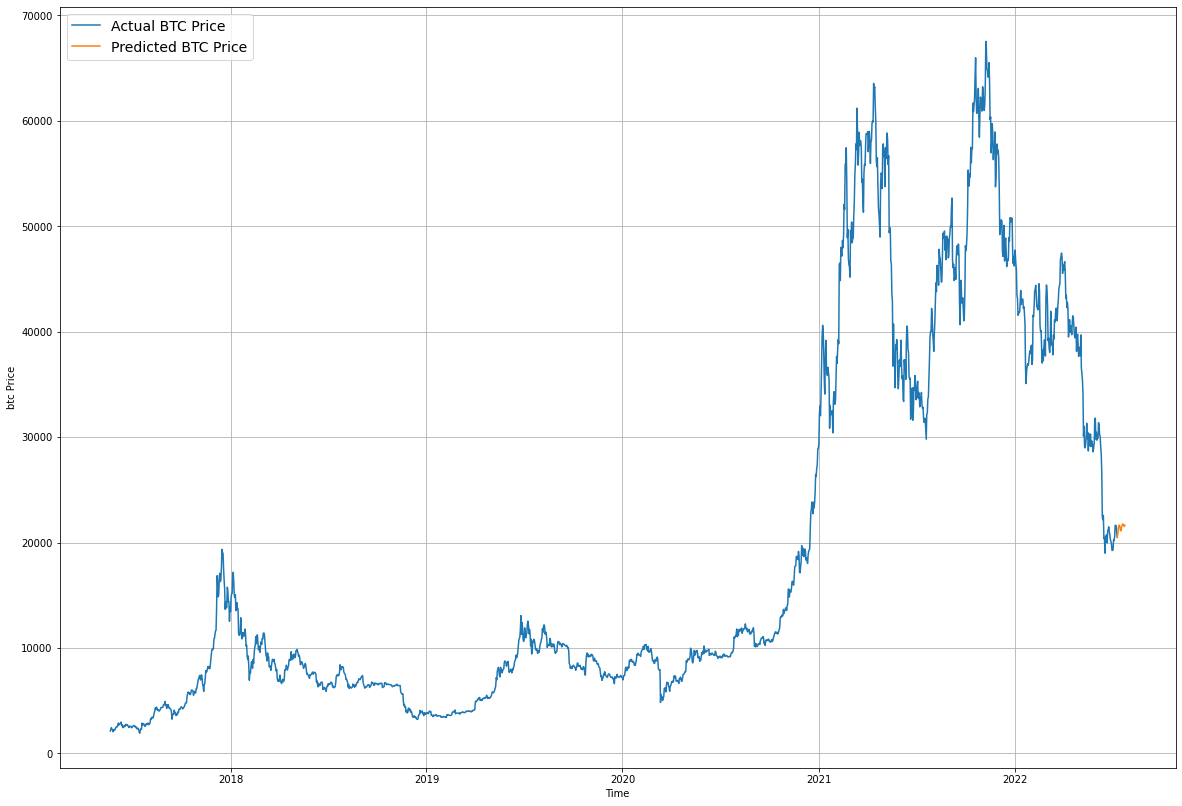

In [ ]:
plt.figure(figsize=(20, 14))
plot_time_series(df.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

#Model 10 turkey problem

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
btc_timesteps_turkey = np.array(df.index)
btc_timesteps_turkey[-5:]

array(['2022-07-07T00:00:00.000000000', '2022-07-08T00:00:00.000000000',
       '2022-07-09T00:00:00.000000000', '2022-07-10T00:00:00.000000000',
       '2022-07-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df.index

DatetimeIndex(['2010-07-18', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23', '2010-07-24', '2010-07-25',
               '2010-07-26', '2010-07-27',
               ...
               '2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-09',
               '2022-07-10', '2022-07-11'],
              dtype='datetime64[ns]', name='Date', length=4377, freq=None)

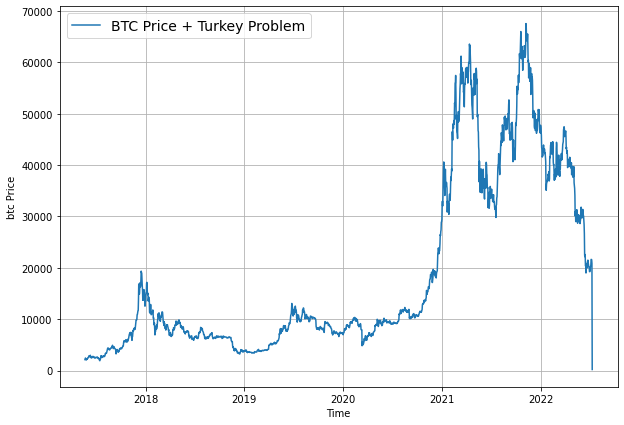

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(3496, 874, 3496, 874)

In [ ]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkuy_Model"

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=1,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

Epoch 1/100
110/110 [==============================] - 1s 10ms/step - loss: 213.6854 - val_loss: 1516.9393
Epoch 2/100
110/110 [==============================] - 1s 9ms/step - loss: 109.9162 - val_loss: 1336.5107
Epoch 3/100
110/110 [==============================] - 1s 9ms/step - loss: 107.8621 - val_loss: 1257.9991
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 99.4872 - val_loss: 1155.1024
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 93.5684 - val_loss: 1110.8696
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 95.4704 - val_loss: 1201.7714
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 92.6499 - val_loss: 1206.0656
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 87.4025 - val_loss: 1175.7684
Epoch 9/100
110/110 [==============================] - 1s 13ms/step - loss: 85.0328 - val_loss: 1002.5522
Epoch 10/100
110/110 [============================

In [ ]:
turkey_model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 1321.3094


1321.3094482421875

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

array([9794.515 , 9337.683 , 9286.169 , 9362.677 , 9338.348 , 9601.5205,
       9374.753 , 9030.722 , 8542.175 , 8515.487 ], dtype=float32)

In [ ]:

turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 20071.436,
 'mse': 617177700.0,
 'rmse': 24302.227,
 'mape': 123.93146,
 'mase': 21.702011}

In [ ]:
model_1_results

{'mae': 908.4912,
 'mse': 1997341.9,
 'rmse': 1413.2734,
 'mape': 2.8025308,
 'mase': 1.0076104}

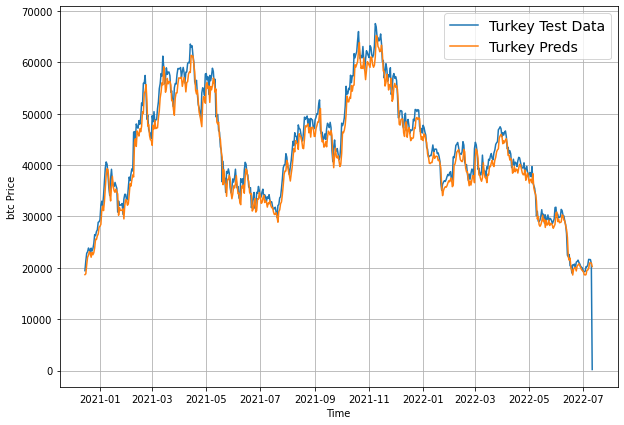

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,900.718140,1.973429e+06,1404.787842,2.798980,0.999437
model_1_dense_w7_h1,908.491211,1.997342e+06,1413.273438,2.802531,1.007610
model_2_dense_w30_h1,969.199402,2.183864e+06,1477.790283,2.989469,1.070567
model_3_dense_w30_h7,987.865417,2.267019e+06,1036.938477,3.061250,1.090318
model_4_CONV1D,20356.281250,6.351956e+08,24684.000000,110.394775,22.577217
model_5_LSTM,916.326599,2.038963e+06,1427.922729,2.814945,1.016301
model_6_multivariate,901.041504,1.987984e+06,1409.958984,2.794155,0.999348
model_8_NBEATs,2578.323486,1.104632e+07,3323.600342,8.264180,2.859627
model_9_ensemble,913.228088,2.007967e+06,1417.027710,2.874380,1.012864
model_10_turkey,20071.435547,6.171777e+08,24302.226562,123.931458,21.702011


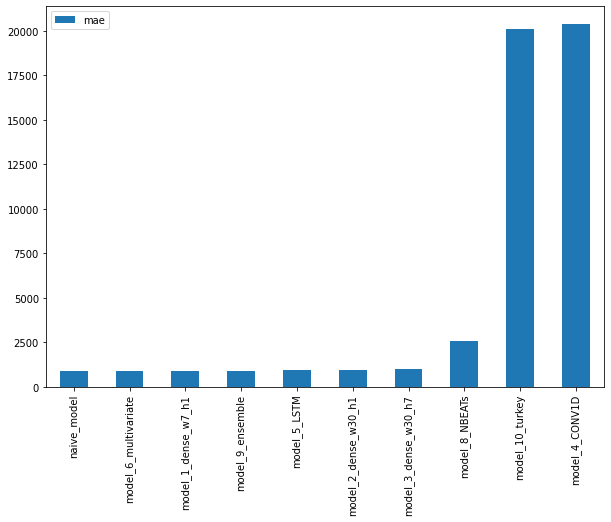

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");